In [0]:
# MAT 185 Final Exam, Fall 2019

Stident: 
    
Instructor: Lydia S. Novozhilova
    
Grading: Final contributes up to 25% to your grade
- Each question is 0.5 points
- Each exercise is 2 points (nicely written working code (1 pt);example (0.5 pt), input and output (0.5 pt))
- Mini project is 10 points
    
__Your Score:__

__Instructions__

- An empty cell after each question and each exercise is for your answer. If you need more cells for your answer, use Insert menu option.
- Solution to any exercise that involves a function made by you should be tested on an example of your choice.
- The phrase "make a CAS function" means "make a SageMath function."

In [0]:
Q1. 

Define a linear Diophantine equation (LDE). Give an example of an LDE that does not have solution and explain why it is so. Use SageMath to find a particular solution to the LDE $3x+7y=15.$

In [2]:
A Diophantine equation is a polynomial equation, usually in two or more unknowns, such that only the integral solutions are required.
Example: 3x+6y=8 
    It does not have solutioin because o integral values of x and y exists that can satisfy the equation 3x+6y=8


In [3]:
reset

<built-in function reset>

In [11]:
x, y = var('x, y')
solve(3*x+6*y==8,x,y)

[[x == -2*r1 + 8/3, y == r1]]

Q2. 

Use SageMath interactively to find the scalar projection of the vector $u=[-2,1]$ on the direction of the vector $v=[1,3].$

In [0]:
proj=((u*v)/|u|^2)*u
    =1/(sqr(5)^2)*(-2 1)
    =(-2/5 1/5)


Q3

Construct a polynomial function that has a double root and plot the function.

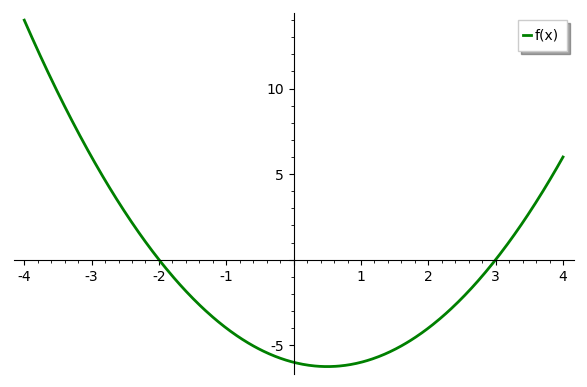

In [14]:
f(x)=x^2-x-6
plot(f(x),-4,4,legend_label='f(x)',color='green',thickness=2)

Q4

Define the basin of attraction of a fixed point. Check that the point $x=3$ is the fixed point of the iteration problem $x=(x^2+6)/5.$ Find the basin of attraction of this point.


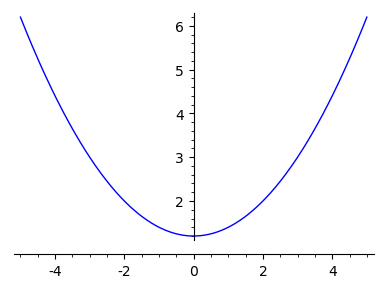

In [16]:
g(x)=(x^2+6)/5
plot(g,-5,5,figsize=[4,3])

In [19]:
def simple_iteration(g,a,n):
    L=[a]
    for j in range(n):
        temp=g(L[j-1]).n()# Encode the iteration formula here
        L.append(temp)
    return L


simple_iteration(g,3,4)

[3, 3.00000000000000, 3.00000000000000, 3.00000000000000, 3.00000000000000]

In [21]:
simple_iteration(g,-1,4)

[-1, 1.40000000000000, 1.40000000000000, 1.59200000000000, 1.59200000000000]

Q5

Write the differential of the function $f(x)=\sin(2x)$ at the point $x=\pi/4.$


In [0]:
sin(2x) d/dx = cos(2x)*2
At point x=π/4, cos(2x)*2=cos(2*(π/4))*2= cos(π/2)*2= 0*2 = 0

In [30]:
diff((sin(2*x)),x)

2*cos(2*x)

Q6

Determine if the functions $f(x)=(x^3+5x)/(2x)$ and $g(x)=\int_{0}^{x} t dt$ are antiderivatives of the same function. 


In [36]:
diff((x^3+5*x)/(2*x))


t |--> -1/2*(3*(cos(t) + 2)^2*sin(t) + 5*sin(t))/(cos(t) + 2) + 1/2*((cos(t) + 2)^3 + 5*cos(t) + 10)*sin(t)/(cos(t) + 2)^2

In [41]:
f=(x^3+5*x)/(2*x)
derivative(f,x)

1/2*(3*x^2 + 5)/x - 1/2*(x^3 + 5*x)/x^2

## Exercises

E1

Make a CAS function __my_PPT(s, t)__ that takes two odd mutually prime integers $s, t$  with 
$s > t$ and $t \ge 1$ and returns corresponding PPT. Include a verification of the mutual primality of $s$ and $t.$ Verification of the inequality conditions $s > t, t \ge 1$ is not required in your code.


In [33]:
def remove_multiple(s,t):
    for c in t:
        if (c % s)==0:
            t.remove(c)
    return t

t=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20];
remove_multiple(2,t)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

E2

Make a CAS function that takes the general equations of two lines, $a_j*x+b_j*y+c_j=0,\ j=1,2,$ and checks if the lines are parallel. If true, the function returns the distance between the two lines. If false, the function returns zero.

E3

Make a CAS function that finds all $k^{th}$ roots of a number $a, a>0$ and plots the k-gon with vertices at the roots.


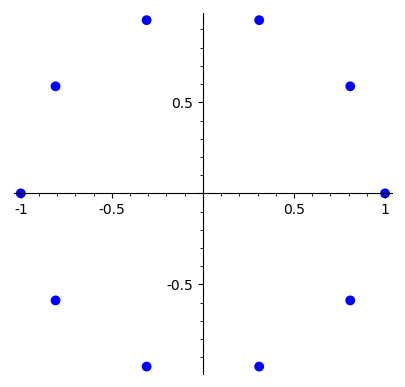

In [48]:
def roots_of_unity(n):
    L=[N(cos(2*pi*k/n) + i*sin((2*pi*k)/n)) for k in range(n)]
    return L
L = roots_of_unity(10);L
S = [(L[j].real(),L[j].imag()) for j in range(10)]; S
point(S,aspect_ratio=1,size=50)


E4

Approximate the change in the radius of the base of a cone of height $h$ needed to increase the cone volume by 10%.


In [0]:

Volume of cone (V) =1/3*pi*r^2*h

If radius and height increase by 10%, r becomes 1.1r, h becomes 1.1h.

V' = (1/3)(pi)((1.1r)^2(1.1h) = (1.1)^3(1/3)(pi)r^2 (h) = 1.331V

Change in volume = 1.331V - V = 0.331V

E5

Plot the curve $x=2+\cos(t), y=3*\sin(t)-1, t\in [0,2*\pi].$


Find the area bounded by the curve.

In [34]:
x(t)=2+cos(t); y(t)=3*sin(t)-1 
curve=parametric_plot((x(t),y(t)),(t,0,2*pi));curve
part1=parametric_plot((x(t),y(t)),(t,0, 2*pi));part1




E6

Consider a 2π-periodic function defined on $[-\pi, \pi]$ as $f(x) =x^{1/3}.$ Find the partial sum $S_4$ of the Fourier series for this function. 

Plot the function and the trigonometric polynomial $S_4$ that you constructed in one figure.


In [42]:
def acoef(f,n,t0,T):
    L=[integral(f*cos(k*t),t,t0,T) for k in range(n+1) ]
    return [c/pi for c in L]


def bcoef(f,n,t0,T):
    L=[integral(f*sin(k*t),t,t0,T) for k in range(n+1) ]
    return [l/pi for l in L]

g(t)=x^(1/3)
A=acoef(sin(t),10,0,pi);A
B=bcoef(sin(t),10,0,pi);B
S_nB=(B[0]/2+B[1]*cos(t)+B[2]*cos(2*t));S_nB
S_3(t)=(A[0]/2+A[2]*cos(2*t)+A[4]*cos(4*t)+A[6]);S_3
S_4(t)=(A[0]/2+A[2]*cos(2*t)+A[4]*cos(4*t)+A[6]*cos(6*t));S_4

plot_g=plot(g(t),-pi,pi,figsize=[4,3])
plotS_3=plot(S_3(t),-pi,pi,figsize=[4,3],color='green')
plotS_4=plot(S_4(t),-pi,pi,figsize=[4,3],color='red',linestyle="--");plotS_3+plotS_4+plot_g

plot_g=plot(g(t),0,pi,figsize=[4,3])
plotB=plot(S_nB(t),0,pi,figsize=[4,3],color='red');plot_g+plotB


verbose 0 (3698: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 100 points.


verbose 0 (3698: plot.py, generate_plot_points) Last error message: 'negative number cannot be raised to a fractional power'


# The End